# A basic example of a full neural network

Below is a simple example of how to code a neural network using keras tensor flow.

In [0]:
# Import tensorflow and keras
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, odr

import matplotlib as mpl
plt.rcdefaults()
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)


#------------------------------------------
# this is for running in colaboratory
#------------------------------------------
# show plots inline
#%matplotlib inline    

#plt.style.use('seaborn-whitegrid')

## Linear regression example

In [0]:
# Data that doesn't seem to work

url = 'https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv'
data = pd.read_csv(url)
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
x = (x-np.mean(x))/np.std(x)


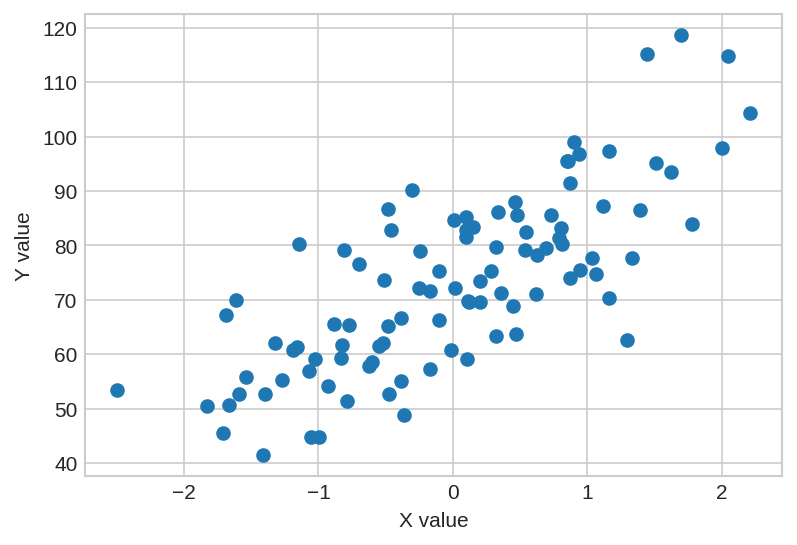

In [3]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

plt.figure()
plt.scatter(x, y)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

In [4]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# number of units in each layer
n_units = 1

# define the model
model = tf.keras.Sequential()

# Input layer is defined later
# First hidden layer: densely-connected layer with n_units units and activation function 'linear'.

model.add(layers.Dense(n_units, activation='linear'))
model.add(layers.Dense(1))

# Gradient descent training method:
#   NNs use gradient descent methods to determine the parameters. 
#   There are different strategies to adaptively choose the learning rate (step size).
#   Gradient descent methods use adaptive learning rates (step size). 
#   Common choice: Adam
#   See http://ruder.io/optimizing-gradient-descent/index.html#adam

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mse',       # mean squared error
            metrics=['mae'])  # mean absolute error

# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs = 2000

history = model.fit(x, y, epochs=n_epochs, batch_size=64, verbose=0, validation_split=0.2)   
print('done training')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
done training


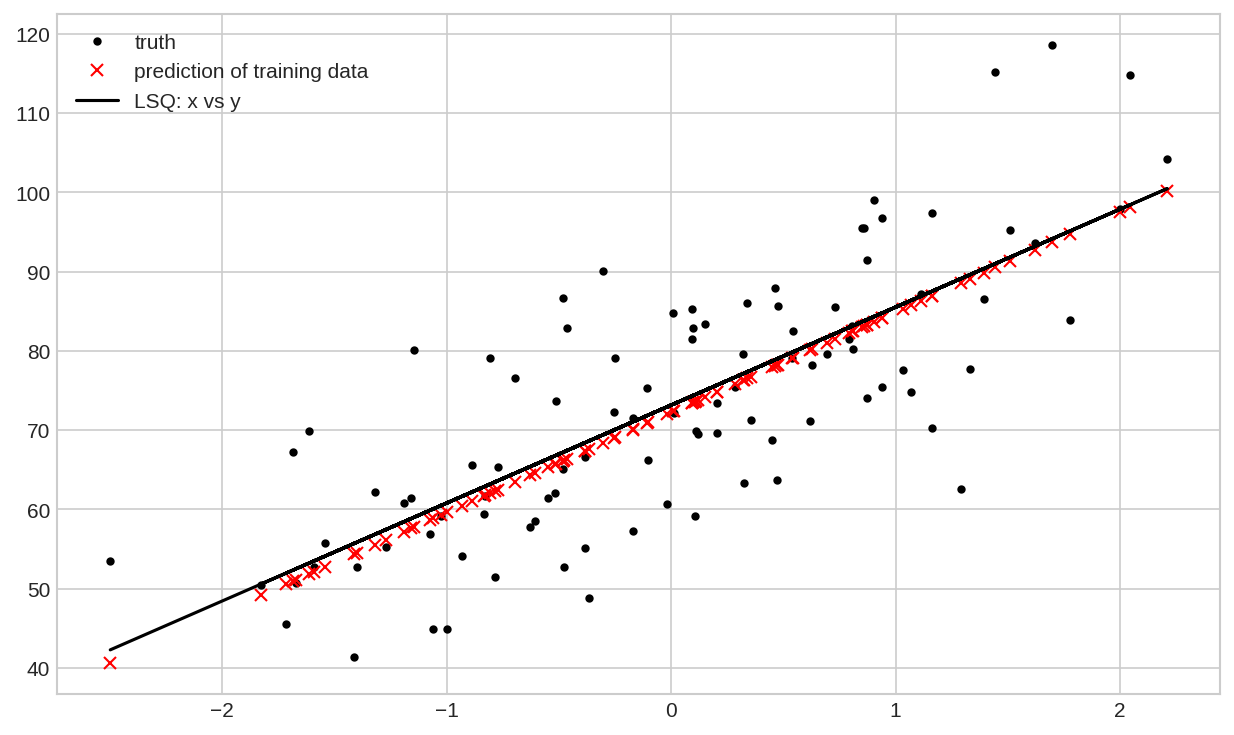

In [5]:
ypred = model.predict(x)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='red', label='prediction of training data')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.squeeze(x),np.squeeze(y))
plt.plot(x,intercept+x*slope,'-',color = 'black', label = 'LSQ: x vs y')
plt.legend()

#plt.ylim(0,120)
#plt.xlim(0,120)

plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


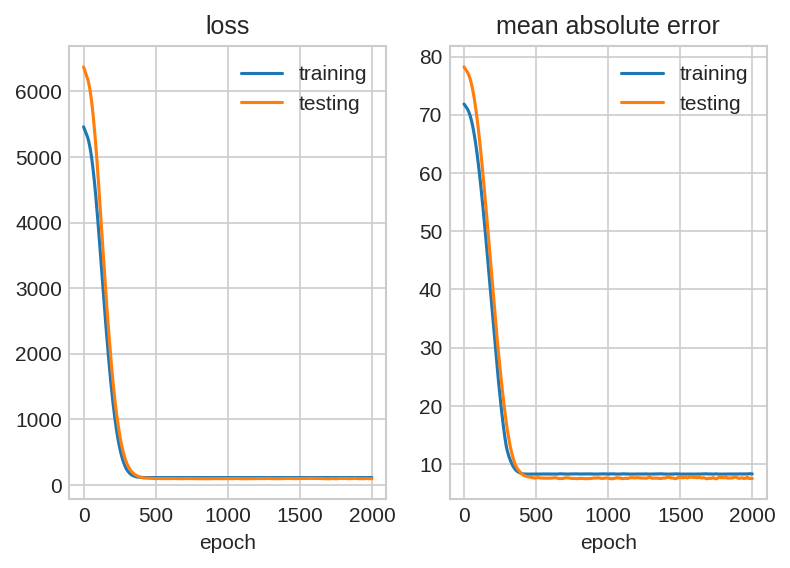

In [6]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'],label = 'training')
plt.plot(history.history['val_mean_absolute_error'], label = 'testing')
plt.title('mean absolute error')
plt.xlabel('epoch')
plt.legend()

plt.show()

## A non-linear, more interesting example

In [0]:
# define a function to be approximated
def my_function(x):
  return np.round(np.sin(x * np.pi))
  #return np.sin(x * np.pi/2)

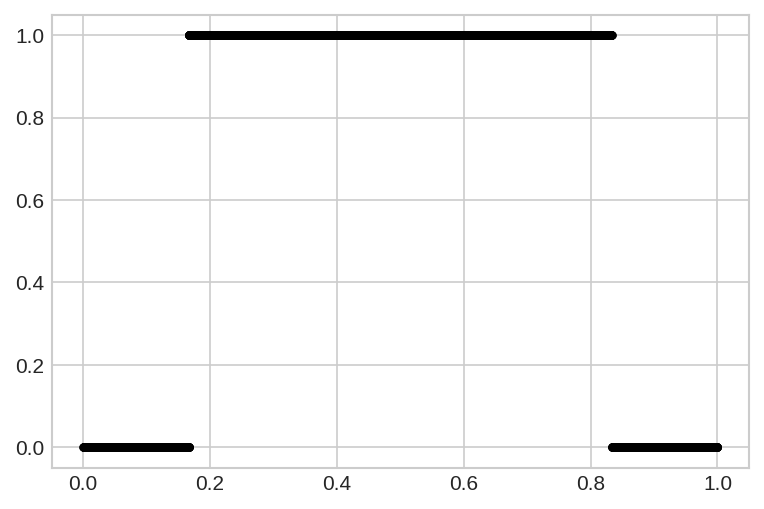

In [8]:
# make some "truth" data
# generate lots of sample pairs (x, f(x))

n_samples = 10000
x = np.random.random((n_samples,1))
y = my_function(x)  

# plot the (x,y) pairs.
plt.figure()
plt.plot(x, y, '.', color='black');
plt.show()

In [9]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# number of units in each layer
n_units = 30

# define the model
model = tf.keras.Sequential()

# Input layer is defined later

# First hidden layer: densely-connected layer with n_units units and activation function 'relu'.
model.add(layers.Dense(n_units, activation='relu'))
#model.add(layers.Dense(1, activation='linear'))

# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(1))

# Activation function above:
#   relu = rectified linear unit.  relu(x) = max(0,x).
#   See https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

# Gradient descent training method:
#   NNs use gradient descent methods to determine the parameters. 
#   There are different strategies to adaptively choose the learning rate (step size).
#   Gradient descent methods use adaptive learning rates (step size). 
#   Common choice: Adam
#   See http://ruder.io/optimizing-gradient-descent/index.html#adam

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mae',       # mean absolute error = mae
            metrics=['mse'])  # mean squared error = mse

# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs = 200

history = model.fit(x, y, epochs=n_epochs, batch_size=128, verbose=0, validation_split=0.2)   
print('done training')

done training


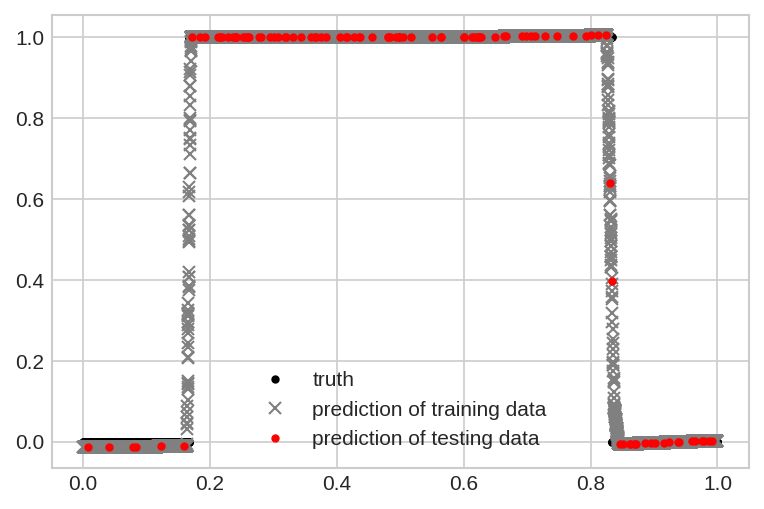

In [10]:
ypred = model.predict(x)

# create new samples in x
px = np.random.random((100 ,1))
# predict y
py = model.predict(px)

# plot predicted values
plt.figure()
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='gray', label='prediction of training data')
plt.plot(px, py, '.', color='red', label='prediction of testing data')
plt.legend()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


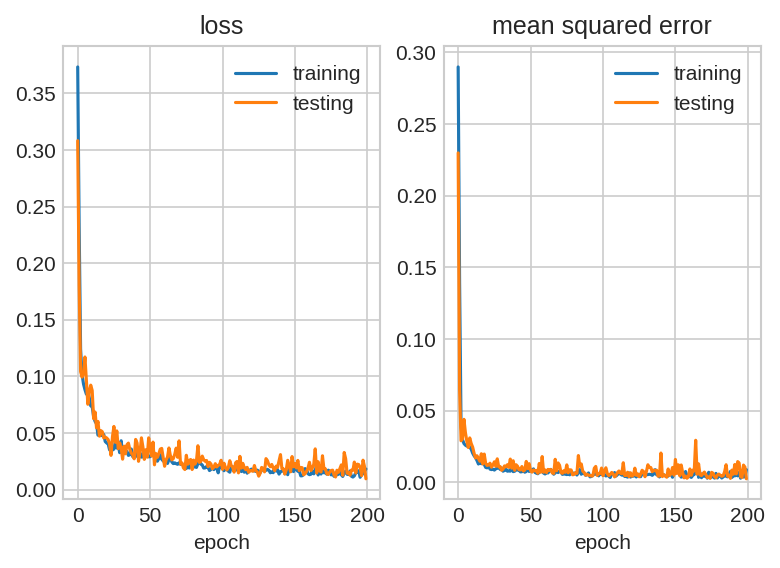

In [11]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mean_squared_error'],label = 'training')
plt.plot(history.history['val_mean_squared_error'], label = 'testing')
plt.title('mean squared error')
plt.xlabel('epoch')
plt.legend()


plt.show()